In [1]:
# Dependencies.
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

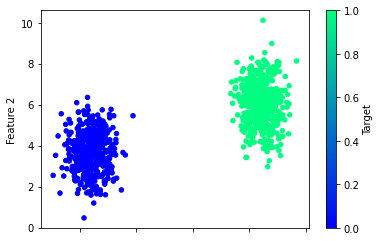

In [2]:
# Generate the dummy dataset.
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create a DataFrame from the dummy data.
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
# Add the target variable column.
df['Target'] = y

# Plot data.
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Scale the data, start with instance creation.
X_scaler = skl.preprocessing.StandardScaler()

# Fit scaler.
X_scaler.fit(X_train)

# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create Keras Sequential model.
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer.
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [7]:
# Create the Dense output layer, with probability activation function.
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
# Check the structure of the Sequential model.
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics.
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit the model to the training data.
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 434us/step - loss: 0.9384 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 434us/step - loss: 0.9103 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 390us/step - loss: 0.8852 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 564us/step - loss: 0.8623 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 564us/step - loss: 0.8417 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 434us/step - loss: 0.8236 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 477us/step - loss: 0.8066 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 520us/step - loss: 0.7916 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 434us/step - loss: 0.7780 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0

24/24 [==============================] - 0s 390us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 82/100
24/24 [==============================] - 0s 390us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 83/100
24/24 [==============================] - 0s 434us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 84/100
24/24 [==============================] - 0s 390us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 85/100
24/24 [==============================] - 0s 434us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 86/100
24/24 [==============================] - 0s 434us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 87/100
24/24 [==============================] - 0s 433us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 88/100
24/24 [==============================] - 0s 390us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 89/100
24/24 [==============================] - 0s 390us/step - loss: 0.6931 - accuracy: 0.5053
Epoch 90/100
24/24 [==============================] - 0s 390us/step - loss: 0.6931 - accuracy: 

<AxesSubplot:>

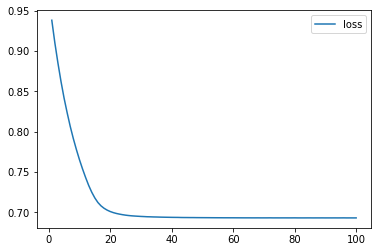

In [11]:
# Create a DataFrame to contain the training history.
hist_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss.
hist_df.plot(y='loss')

<AxesSubplot:>

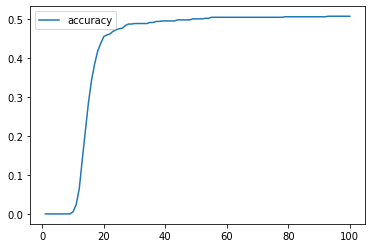

In [12]:
# Plot the accuracy with the same DF.
hist_df.plot(y='accuracy')

In [13]:
# Evaluate the model using the test data.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6939 - accuracy: 0.4800
Loss: 0.6939134001731873, Accuracy: 0.47999998927116394


In [14]:
# Predict the classification of a new set of blob data.
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
# Use same trained scaling method.
new_X_scaled = X_scaler.transform(new_X)
# Predict the classification, using 50% cut-off.
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [15]:
# Compare to new_y.
model_loss, model_accuracy = nn_model.evaluate(new_X_scaled, new_y, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6933 - accuracy: 0.5000
Loss: 0.6932609677314758, Accuracy: 0.5


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

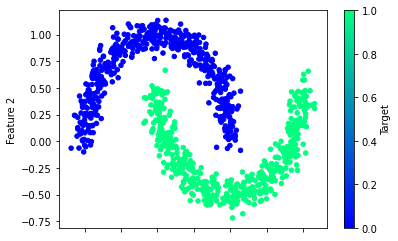

In [16]:
# Create new dummy data in shape of moons.
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transform the y_moons data to a vertical vector.
y_moons = y_moons.reshape(-1, 1)

# Create a DataFrame to plot the nonlinear data.
df = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df['Target'] = y_moons

# Plot the data.
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [17]:
# Split the data.
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scalar instance.
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler.
X_moon_scaler.fit(X_moon_train)

# Scale data.
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Train the model with the nonlinear data.
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 694us/step - loss: 0.6958 - accuracy: 0.4373
Epoch 2/100
24/24 [==============================] - 0s 607us/step - loss: 0.6928 - accuracy: 0.5227
Epoch 3/100
24/24 [==============================] - 0s 650us/step - loss: 0.6922 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 607us/step - loss: 0.6920 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.6919 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 650us/step - loss: 0.6918 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 607us/step - loss: 0.6917 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 650us/step - loss: 0.6917 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 607us/step - loss: 0.6916 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 607us/step - loss: 0.6916 - accura

24/24 [==============================] - 0s 650us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 82/100
24/24 [==============================] - 0s 650us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 781us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 650us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 694us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 607us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 607us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 607us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 650us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 650us/step - loss: 0.6913 - accuracy: 

<AxesSubplot:>

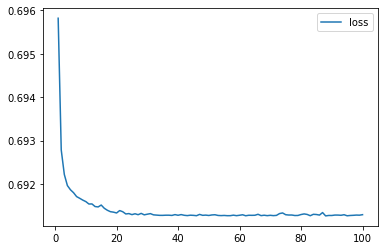

In [19]:
# Create training history DF.
hist_df = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history["loss"])+1))

# Plot loss.
hist_df.plot(y='loss')

<AxesSubplot:>

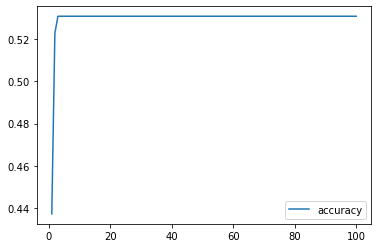

In [20]:
# Plot accuracy.
hist_df.plot(y='accuracy')

In [21]:
# Generate a new Sequential model.
new_model = tf.keras.models.Sequential()

In [22]:
# Add input and hidden layer.
number_inputs = 2
number_hidden_nodes = 6

# Add Dense layer.
new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

# Add the output layer that uses a probability activation function.
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
# Complie the model.
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the scaled training data.
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 477us/step - loss: 0.7473 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 434us/step - loss: 0.6931 - accuracy: 0.4853
Epoch 3/100
24/24 [==============================] - 0s 390us/step - loss: 0.6457 - accuracy: 0.5173
Epoch 4/100
24/24 [==============================] - 0s 390us/step - loss: 0.6036 - accuracy: 0.5467
Epoch 5/100
24/24 [==============================] - 0s 434us/step - loss: 0.5667 - accuracy: 0.5520
Epoch 6/100
24/24 [==============================] - 0s 434us/step - loss: 0.5348 - accuracy: 0.5920
Epoch 7/100
24/24 [==============================] - 0s 390us/step - loss: 0.5064 - accuracy: 0.6760
Epoch 8/100
24/24 [==============================] - 0s 390us/step - loss: 0.4815 - accuracy: 0.8453
Epoch 9/100
24/24 [==============================] - 0s 390us/step - loss: 0.4597 - accuracy: 0.8680
Epoch 10/100
24/24 [==============================] - 0s 390us/step - loss: 0.4404 - accura

24/24 [==============================] - 0s 374us/step - loss: 0.2494 - accuracy: 0.9000
Epoch 82/100
24/24 [==============================] - 0s 390us/step - loss: 0.2493 - accuracy: 0.9000
Epoch 83/100
24/24 [==============================] - 0s 390us/step - loss: 0.2489 - accuracy: 0.9000
Epoch 84/100
24/24 [==============================] - 0s 434us/step - loss: 0.2487 - accuracy: 0.9000
Epoch 85/100
24/24 [==============================] - 0s 418us/step - loss: 0.2485 - accuracy: 0.9000
Epoch 86/100
24/24 [==============================] - 0s 390us/step - loss: 0.2483 - accuracy: 0.9000
Epoch 87/100
24/24 [==============================] - 0s 390us/step - loss: 0.2481 - accuracy: 0.9000
Epoch 88/100
24/24 [==============================] - 0s 390us/step - loss: 0.2478 - accuracy: 0.9000
Epoch 89/100
24/24 [==============================] - 0s 390us/step - loss: 0.2476 - accuracy: 0.9000
Epoch 90/100
24/24 [==============================] - 0s 375us/step - loss: 0.2474 - accuracy: 